In [24]:
# import libraries for data processing
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 7.0)

sns.set_context('notebook')
sns.set_style('darkgrid')
from warnings import filterwarnings
filterwarnings('ignore')

In [25]:
# import the dataset
data = pd.read_csv('bestsellers with categories.csv')

# check the head of the dataset
data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [26]:
# check the info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
Name           550 non-null object
Author         550 non-null object
User Rating    550 non-null float64
Reviews        550 non-null int64
Price          550 non-null int64
Year           550 non-null int64
Genre          550 non-null object
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


#### Observation

There are 5 columns in the dataset.
The Name, Author and Genre columns have string dataypes.
Reviews, Price and Year columns have integers as their dataypes while the User Rating column has float as its datatype

In [27]:
# get statistical information
data.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [28]:
# check for missing values
data.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

#### Observation

There are no missing values in the dataset

In [29]:
# check for duplicates in the dataset

data.drop_duplicates(subset= ['Name'], keep= 'last', inplace= True)
data.shape

(351, 7)

In [30]:
# make corrections in the columns
data['Author']= data['Author'].replace(["J. K. Rowling"], ["J.K. Rowling"])
data['Name']= data['Name'].replace(["The 5 Love Languages: The Secret to Love that Lasts"],
                               ["The 5 Love Languages: The Secret to Love That Lasts"])

### ASSESSMENT QUESTIONS

#### Best Selling books of the decade

In [31]:
def best_selling_decade(data):
    by_year= data.groupby('Year')['User Rating'].max().to_dict()
    years= data.Year.unique()
    books_data= pd.DataFrame(columns= ['Name', 'Reviews'])
    
    for c, year in enumerate(years):
        bests= data[(data['User Rating'] == by_year[year]) & (data['Year']== year)]
        a= bests['Reviews'].to_dict()
        count= max(a, key= a.get)
        books_data= books_data.append(bests.loc[count][['Name', 'Reviews']], ignore_index= True, )
    return books_data

In [32]:
best_selling_decade(data)

,Name,Reviews
0,Harry Potter and the Chamber of Secrets: The I...,19622
1,The Help,13871
2,Last Week Tonight with John Oliver Presents A ...,11881
3,Dog Man: A Tale of Two Kitties: From the Creat...,4786
4,"Oh, the Places You'll Go!",21834
5,Rush Revere and the First Patriots: Time-Trave...,3836
6,The Last Olympian (Percy Jackson and the Olymp...,4628
7,Where the Wild Things Are,9967
8,Humans of New York : Stories,2812
9,Rush Revere and the Brave Pilgrims: Time-Trave...,7150


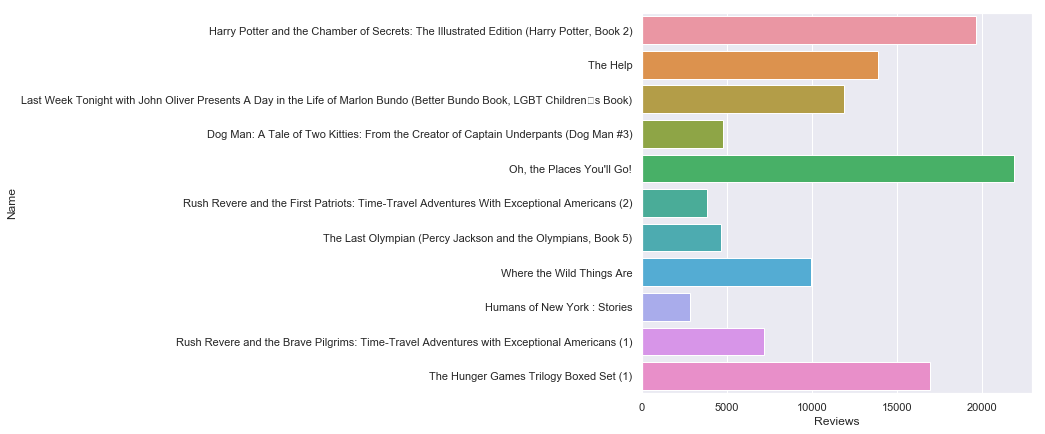

In [33]:
best_selling_=best_selling_decade(data)
sns.barplot(x= best_selling_['Reviews'], y= best_selling_['Name'])

#### The percentage of fiction to non-fiction

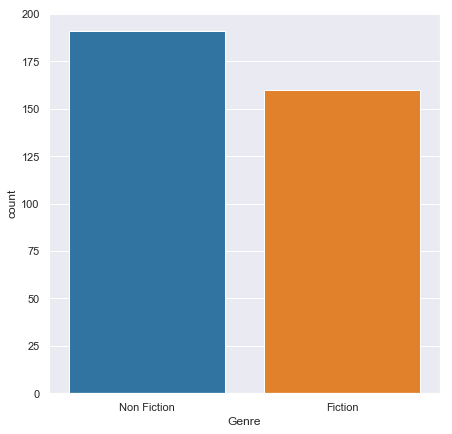

In [35]:
sns.countplot(data['Genre'])

#### Top 10 Authors according to reviews

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

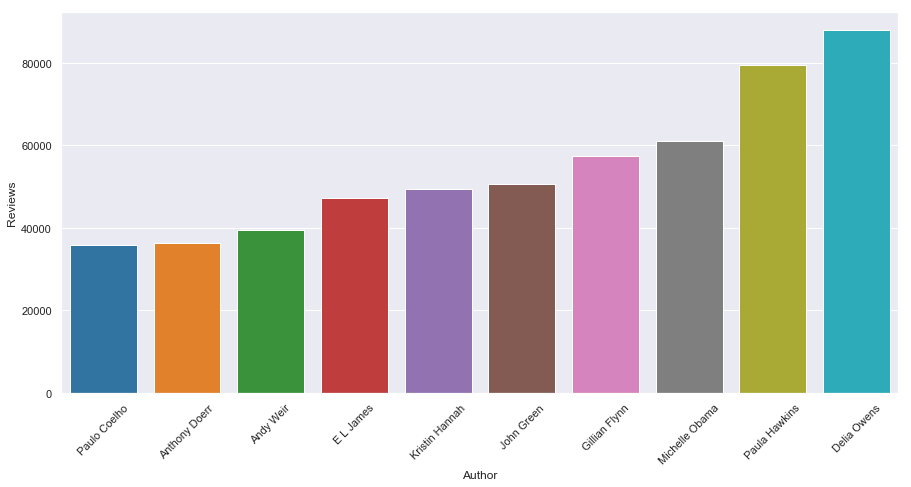

In [37]:
plt.rcParams['figure.figsize'] = (15.0, 7.0)
top10_authors= data.sort_values(by= 'Reviews').tail(10)
sns.barplot(x= top10_authors['Author'], y= top10_authors['Reviews'])
plt.xticks(rotation=45)

#### Trends over the years.

#### Yearly average of ratings

In [38]:
def yearly_trends(data, col):
    try:
        yearly_ratings= pd.DataFrame(data.groupby('Year')[col].mean()).reset_index()
    except Exception as e:
        yearly_ratings= pd.DataFrame(data.groupby('Year')[col].size()).reset_index()
    finally:
        sns.barplot(x= yearly_ratings['Year'], y= yearly_ratings[col])
        plt.xticks(rotation= 30)

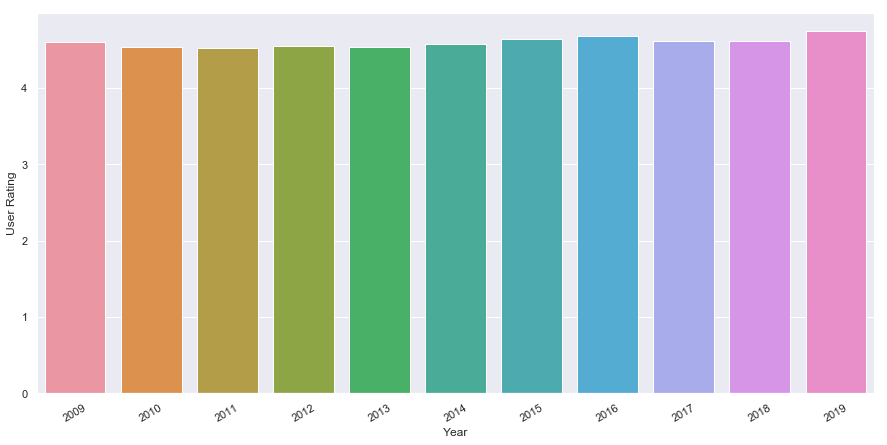

In [41]:
yearly_trends(data, 'User Rating')

From the above plot, it's safe to say quality of books published didn't diminish

#### Yearly average of reviews

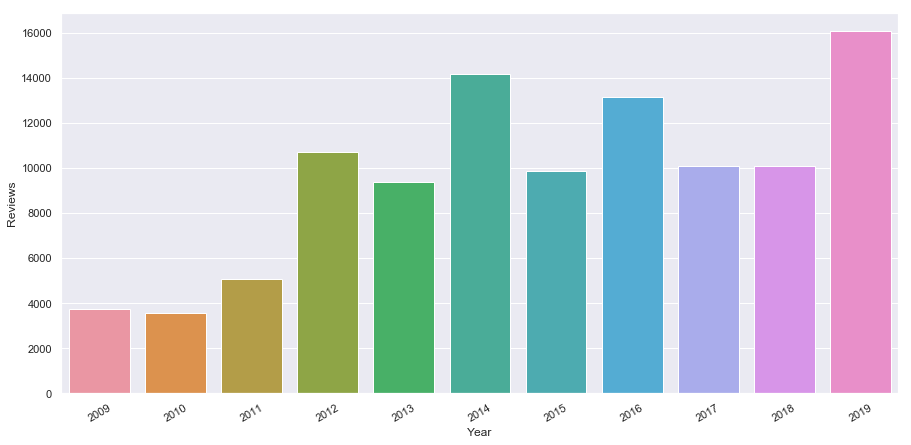

In [42]:
yearly_trends(data, 'Reviews')

From the above plot, it's observed that reviews on books improved greatly in 2019 which shows an improvement in reading habit

#### Yearly average of Price

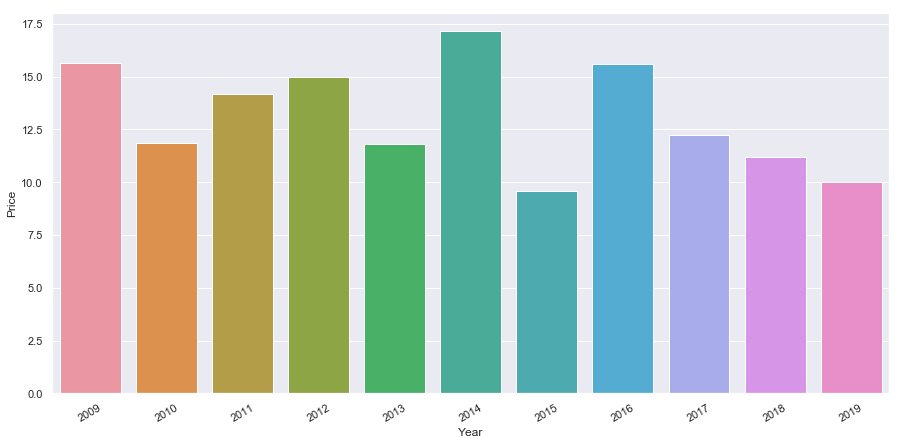

In [44]:
yearly_trends(data, 'Price')

The chart above shows the proce trend reduced from 2009 until 2014 which had the highest price. However there was an immediate decrease in the price in the following year followed by steady increase in 2016.

There was a decrease in price from 2016-2019 which could be as a result of low production.